In [1]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt

In [2]:
mu   = 0
sig  = 0.2 / np.sqrt(252)
stop = 0.05
n    = 50000

In [3]:
no_stop_df      = pd.DataFrame(index=range(n), columns=['No Stop Returns'     ])
with_stop_df    = pd.DataFrame(index=range(n), columns=['With Stop Returns'   ])
pretend_stop_df = pd.DataFrame(index=range(n), columns=['Pretend Stop Returns'])

In [4]:
for i in range(n):
    prices = np.cumprod(1 + np.random.normal(mu, sig, 10))
    no_stop_df.iloc[i] = prices[9] - 1
    if np.min(prices) < 1 - stop:
        with_stop_df.iloc[i]    = -stop
        pretend_stop_df.iloc[i] = np.nan
    else:
        with_stop_df.iloc[i]    = prices[9] - 1
        pretend_stop_df.iloc[i] = with_stop_df.iloc[i]

In [5]:
result_df = pd.concat([no_stop_df, with_stop_df, pretend_stop_df], axis=1)
result_df['No Stop Returns'     ] = pd.to_numeric(result_df['No Stop Returns'     ])
result_df['Pretend Stop Returns'] = pd.to_numeric(result_df['Pretend Stop Returns'])
result_df['With Stop Returns'   ] = pd.to_numeric(result_df['With Stop Returns'   ])

In [6]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   No Stop Returns       50000 non-null  float64
 1   With Stop Returns     50000 non-null  float64
 2   Pretend Stop Returns  42531 non-null  float64
dtypes: float64(3)
memory usage: 1.1 MB


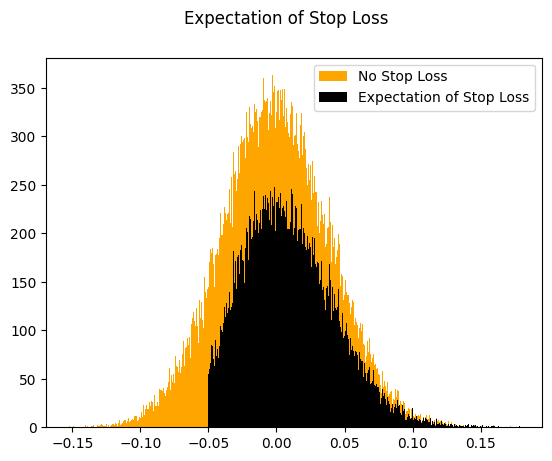

In [9]:
fig, ax = plt.subplots()
fig.suptitle("Expectation of Stop Loss")
ax.hist(result_df['No Stop Returns'     ], bins=500, color='orange' , label="No Stop Loss")
ax.hist(result_df['Pretend Stop Returns'], bins=500, color='black', label="Expectation of Stop Loss")
ax.legend();

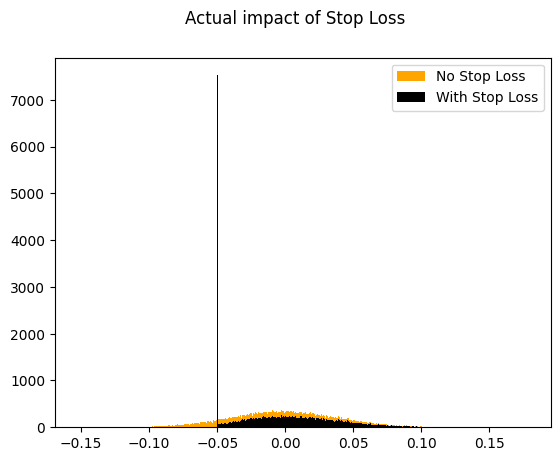

In [11]:
fig, ax = plt.subplots()
fig.suptitle("Actual impact of Stop Loss")
ax.hist(result_df['No Stop Returns'  ], bins=500, color='orange', label="No Stop Loss")
ax.hist(result_df['With Stop Returns'], bins=500, color='black' , label="With Stop Loss")
ax.legend();